In [3]:
import os
import tweepy as tw
import pandas as pd

In [4]:
consumer_key= "EnterYourKeysHere"
consumer_secret= "EnterYourKeysHere"
access_token= "EnterYourKeysHere"
access_token_secret= "EnterYourKeysHere"

In [5]:
#for authentication
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# Define the search term and the date_since date as variables
search_words = "gold+prices"
date_since = "2020-01-01"

In [7]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)
tweets

In [8]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

Investors should be putting their money in gold now, as it represents a "very good hedge" ahead of risk events such… https://t.co/2XL63eCVb0
@Damnzzelle Probably not 😂 

With gold prices the way they are, now is not a fun time to buy heavier gold pieces.
@SkillUpYT I really fell for you guys, as much as we Americans complain about the prices of games we have it better… https://t.co/J86VTMcg44
Gold prices climb back above $1,900 for highest finish in a week https://t.co/P7Fx1mHeMm
Bitcoiners $BTC people 

Why does bitcoin sell off when the market sells off? 

Shouldn’t it be nearly separate?… https://t.co/qj0o171ewZ
RT @_leolionheart_: 🚨Also Breaking: JPM will continue to rig the gold and silver prices.
RT @slscrystals: gold filled necklaces I have available😍 dm me for prices and even more options!✨ https://t.co/UoG7Sq2eVs
RT @guen_tai: UBS says you should buy gold now https://t.co/GxGcHC5axB via @CNBCi
Gold last week recorded its biggest weekly drop since March, but the evidence is tha

In [9]:
#to remove retweets
new_search = search_words + " -filter:retweets"
new_search

'gold+prices -filter:retweets'

In [10]:
#get the new one (without re-tweets) in form of list
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:7]

['Investors should be putting their money in gold now, as it represents a "very good hedge" ahead of risk events such… https://t.co/2XL63eCVb0',
 '@Damnzzelle Probably not 😂 \n\nWith gold prices the way they are, now is not a fun time to buy heavier gold pieces.',
 '@SkillUpYT I really fell for you guys, as much as we Americans complain about the prices of games we have it better… https://t.co/J86VTMcg44',
 'Gold prices climb back above $1,900 for highest finish in a week https://t.co/P7Fx1mHeMm',
 'Bitcoiners $BTC people \n\nWhy does bitcoin sell off when the market sells off? \n\nShouldn’t it be nearly separate?… https://t.co/qj0o171ewZ',
 'Gold last week recorded its biggest weekly drop since March, but the evidence is that the Fed may be forced to expa… https://t.co/VMV9n1H0Xl',
 'Just checked insulin prices, no change. I think Trump’s water is gold-leafed. #PresidentialDebate']

In [11]:
#Details of users tweeting about gold prices
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(1000)

users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.created_at,tweet.user.url] for tweet in tweets]
users_locs[:5]

[['NoreenAmore',
  'Bangkok, Milan, Kuala Lumpur ',
  datetime.datetime(2020, 9, 30, 3, 27, 53),
  None],
 ['logical_blonde',
  'Midwest',
  datetime.datetime(2020, 9, 30, 3, 27, 36),
  None],
 ['TrueCross77', '', datetime.datetime(2020, 9, 30, 3, 22, 23), None],
 ['playdoegold',
  'London, Ontario',
  datetime.datetime(2020, 9, 30, 3, 21, 31),
  None],
 ['FinanceBubble', '', datetime.datetime(2020, 9, 30, 3, 13, 44), None]]

In [12]:
#Create dataframe from the list of twitter data derived
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['User', "Location", "Date & Hour of Tweet","URL Link"])
tweet_text[:5]

,User,Location,Date & Hour of Tweet,URL Link
0,NoreenAmore,"Bangkok, Milan, Kuala Lumpur",2020-09-30 03:27:53,None
1,logical_blonde,Midwest,2020-09-30 03:27:36,None
2,TrueCross77,,2020-09-30 03:22:23,None
3,playdoegold,"London, Ontario",2020-09-30 03:21:31,None
4,FinanceBubble,,2020-09-30 03:13:44,None


In [13]:
#Importing necessary additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from wordcloud import WordCloud, STOPWORDS
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [14]:
#to remove urls, hyperlinks, any mentions and replace with blank space
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [15]:
#Call the above defined function in the list of tweets to create list of cleaned tweets
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Investors should be putting their money in gold now as it represents a very good hedge ahead of risk events such',
 'Damnzzelle Probably not With gold prices the way they are now is not a fun time to buy heavier gold pieces',
 'SkillUpYT I really fell for you guys as much as we Americans complain about the prices of games we have it better',
 'Gold prices climb back above 1900 for highest finish in a week',
 'Bitcoiners BTC people Why does bitcoin sell off when the market sells off Shouldnt it be nearly separate']

In [16]:
#Changing all into lower case - mentioned for loop as lower() doesnt apply on list
lower_case = [word.lower() for word in all_tweets_no_urls]
lower_case[:8]

['investors should be putting their money in gold now as it represents a very good hedge ahead of risk events such',
 'damnzzelle probably not with gold prices the way they are now is not a fun time to buy heavier gold pieces',
 'skillupyt i really fell for you guys as much as we americans complain about the prices of games we have it better',
 'gold prices climb back above 1900 for highest finish in a week',
 'bitcoiners btc people why does bitcoin sell off when the market sells off shouldnt it be nearly separate',
 'gold last week recorded its biggest weekly drop since march but the evidence is that the fed may be forced to expa',
 'just checked insulin prices no change i think trumps water is goldleafed presidentialdebate',
 'wheat is down 075uscbu as russian fob offers start to drift lower and with concerns of us wheat remaining unc']

In [17]:
#Check the word freqency by using split that splits words into unique elements of tweets
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['investors',
  'should',
  'be',
  'putting',
  'their',
  'money',
  'in',
  'gold',
  'now',
  'as',
  'it',
  'represents',
  'a',
  'very',
  'good',
  'hedge',
  'ahead',
  'of',
  'risk',
  'events',
  'such'],
 ['damnzzelle',
  'probably',
  'not',
  'with',
  'gold',
  'prices',
  'the',
  'way',
  'they',
  'are',
  'now',
  'is',
  'not',
  'a',
  'fun',
  'time',
  'to',
  'buy',
  'heavier',
  'gold',
  'pieces']]

In [18]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter for each word as to how many times it has been used
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('gold', 958),
 ('prices', 676),
 ('the', 457),
 ('to', 304),
 ('and', 276),
 ('in', 236),
 ('of', 221),
 ('a', 203),
 ('silver', 183),
 ('for', 154),
 ('is', 153),
 ('as', 148),
 ('on', 134),
 ('you', 124),
 ('at', 117)]

In [19]:
#Creating dataframe for further analysis and plotting (but only top 25 common words)
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(25),columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,gold,958
1,prices,676
2,the,457
3,to,304
4,and,276


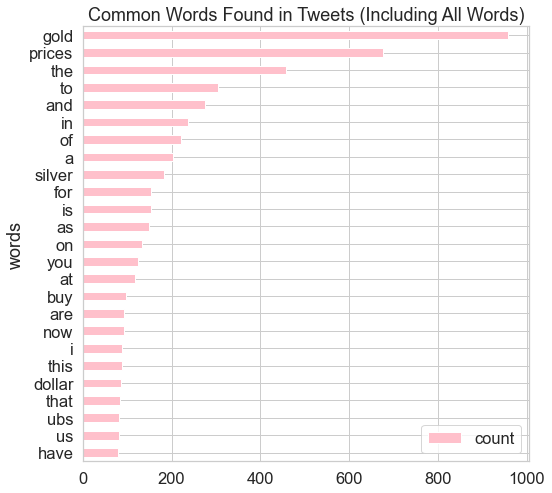

In [20]:
#Plotting 25 common words sorted by count
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [21]:
#Removing stopwords using nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#Removed stopwords from top 25 words
stop_words = set(stopwords.words('english'))

In [23]:
# Remove stop words from each tweet and get list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['investors',
 'putting',
 'money',
 'gold',
 'represents',
 'good',
 'hedge',
 'ahead',
 'risk',
 'events']

In [26]:
#Defining collection words to be removed and adding it with that list without stopwords
collection_words = ['gold','prices','price']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [29]:
#Calculate and plot word frequency of cleaned data derived
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(25)

[('silver', 183),
 ('buy', 98),
 ('dollar', 86),
 ('us', 82),
 ('ubs', 82),
 ('says', 74),
 ('higher', 58),
 ('oil', 55),
 ('record', 55),
 ('week', 51),
 ('rs', 50),
 ('today', 48),
 ('amp', 45),
 ('high', 43),
 ('fall', 35),
 ('rise', 35),
 ('crude', 34),
 ('markets', 33),
 ('think', 29),
 ('rates', 29),
 ('metals', 29),
 ('bank', 28),
 ('back', 26),
 ('time', 25),
 ('go', 25)]

In [30]:
#putting it into a new dataframe
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(25),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,silver,183
1,buy,98
2,dollar,86
3,us,82
4,ubs,82


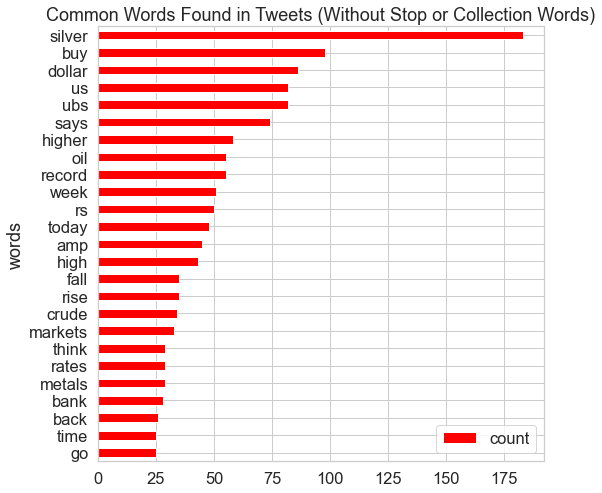

In [34]:
#Plotting first 25
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [56]:
#Creating word cloud - making a new dataframe where all the tweets are included
word_cloud = pd.DataFrame(lower_case,columns=['Tweet'])
word_cloud.head()

,Tweet
0,investors should be putting their money in gol...
1,damnzzelle probably not with gold prices the w...
2,skillupyt i really fell for you guys as much a...
3,gold prices climb back above 1900 for highest ...
4,bitcoiners btc people why does bitcoin sell of...


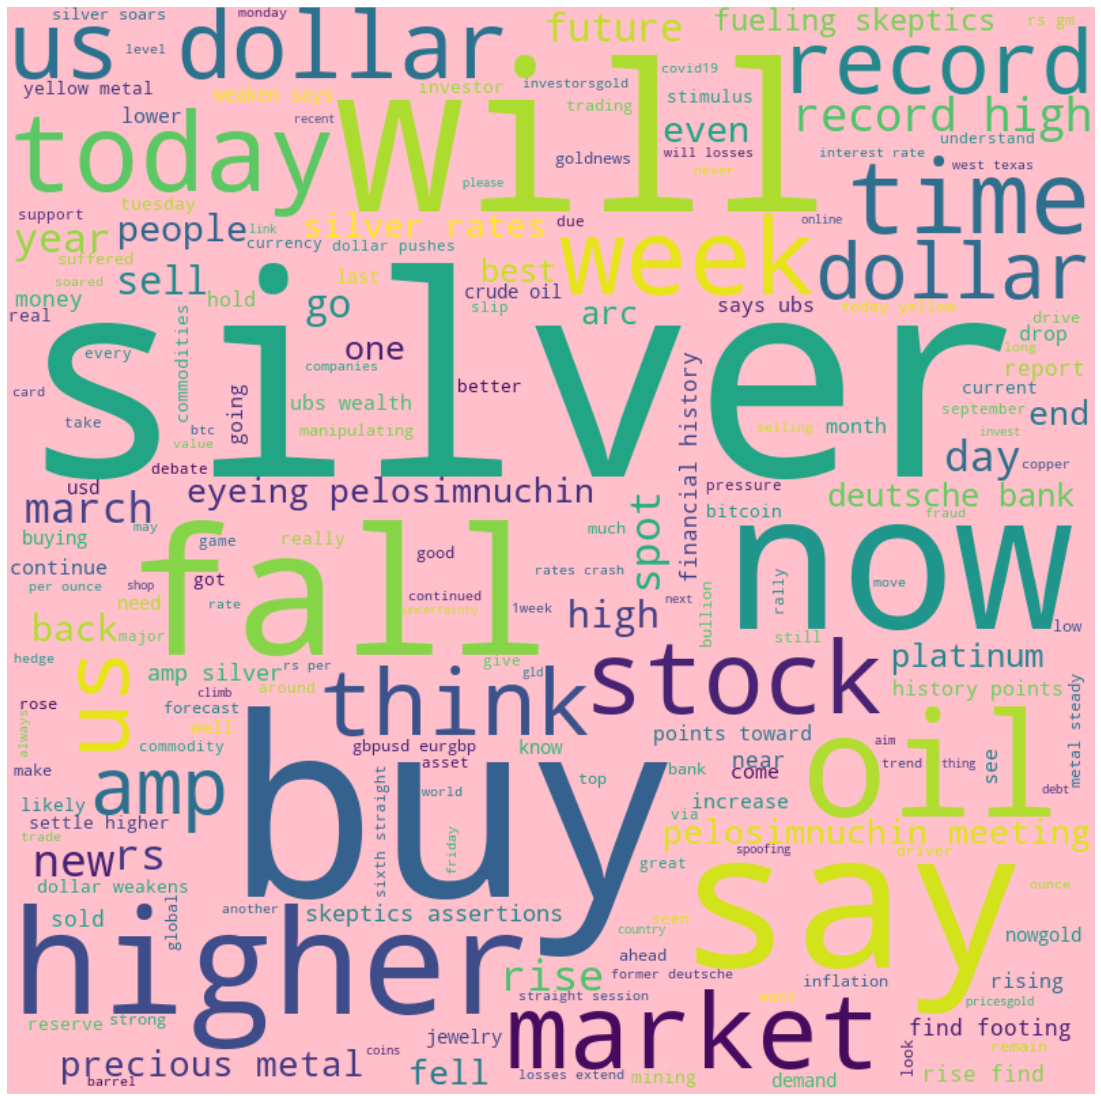

In [67]:
from wordcloud import WordCloud, STOPWORDS
text=''
stop=set(STOPWORDS)
stop.add("gold")
stop.add("prices")
stop.add("price")
stop.add("gold price")
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='pink',
                stopwords = stop, 
                min_font_size = 8).generate(word_cloud["Tweet"].str.cat()) 
  
                      
plt.figure(figsize = (30, 20), facecolor = None) 
plt.imshow(wordcloud1,interpolation = 'bilinear') 
plt.axis("off")  
plt.show()

In [68]:
# Save the image in the img folder:
wordcloud1.to_file("wordcloud2.png")

In [42]:
#Sentiment Analysis
from textblob import TextBlob
#Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in lower_case]
#getting polarity values of first tweet
sentiment_objects[0].polarity, sentiment_objects[0]

(0.45499999999999996,
 TextBlob("investors should be putting their money in gold now as it represents a very good hedge ahead of risk events such"))

In [82]:
#Transform it into a list from which a datafram would be created
# Create list of polarity, subjectivity values and tweet text (3 things)
sentiment_values = [[tweet.sentiment.polarity, tweet.sentiment.subjectivity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.45499999999999996,
 0.6400000000000001,
 'investors should be putting their money in gold now as it represents a very good hedge ahead of risk events such']

In [83]:
# Create dataframe containing the polarity and subjectivity values and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["Polarity_values", "Subjectivity Values","Tweet"])
sentiment_df.head()

,Polarity_values,Subjectivity Values,Tweet
0,0.455,0.64,investors should be putting their money in gol...
1,-0.150,0.20,damnzzelle probably not with gold prices the w...
2,0.300,0.30,skillupyt i really fell for you guys as much a...
3,0.000,0.05,gold prices climb back above 1900 for highest ...
4,0.100,0.40,bitcoiners btc people why does bitcoin sell of...


In [95]:
#Plotting histogram
# Remove polarity values equal to zero
sentiment_df1 = sentiment_df[sentiment_df.Polarity_values != 0]
sentiment_df1.head()

,Polarity_values,Subjectivity Values,Tweet
0,0.455,0.640000,investors should be putting their money in gol...
1,-0.150,0.200000,damnzzelle probably not with gold prices the w...
2,0.300,0.300000,skillupyt i really fell for you guys as much a...
4,0.100,0.400000,bitcoiners btc people why does bitcoin sell of...
5,-0.150,0.133333,gold last week recorded its biggest weekly dro...


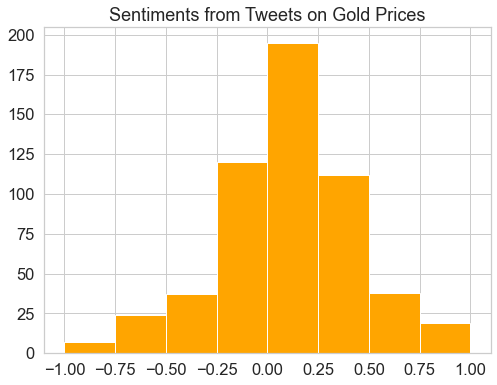

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero to better highlight distribution of polarity values
sentiment_df1['Polarity_values'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")

plt.title("Sentiments from Tweets on Gold Prices")
plt.show()
#It is seen that the histogram has slightly more weightage towards 1 indicating positive sentiment of people towards it

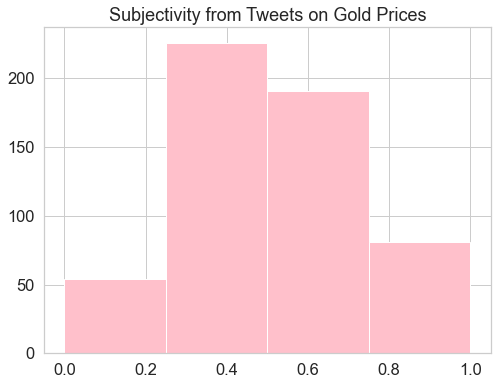

In [97]:
#Plotting subjectivity in the form of histogram
fig, ax = plt.subplots(figsize=(8, 6))
# Plot histogram with break at zero to better highlight distribution of polarity values
sentiment_df1["Subjectivity Values"].hist(bins=[0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="pink")

plt.title("Subjectivity from Tweets on Gold Prices")
plt.show()

In [99]:
# Create list of only polarity, subjectivity values (2 things)
sentiment_values = [[tweet.sentiment.polarity, tweet.sentiment.subjectivity] for tweet in sentiment_objects]

sentiment_values[0]

[0.45499999999999996, 0.6400000000000001]

In [101]:
# Create dataframe containing the polarity and subjectivity values that would be helpful in further plotting
sentiment_df2 = pd.DataFrame(sentiment_values, columns=["Polarity Values", "Subjectivity Values"])
sentiment_df2.head()

,Polarity Values,Subjectivity Values
0,0.455,0.64
1,-0.150,0.20
2,0.300,0.30
3,0.000,0.05
4,0.100,0.40


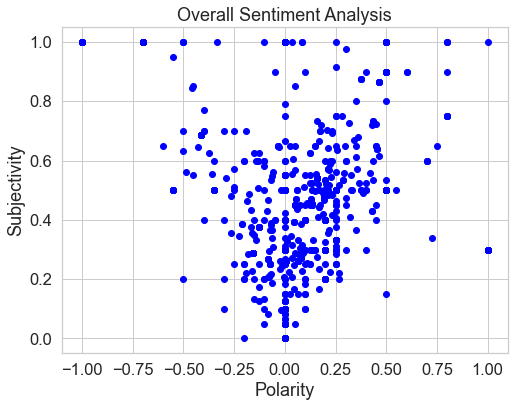

In [103]:
#Plot scatter plot of polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,sentiment_df2.shape[0]):
    plt.scatter(sentiment_df2['Polarity Values'][i], sentiment_df2['Subjectivity Values'][i], color = 'Blue')

plt.title("Overall Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()